In [3]:
# import
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# version check
tf.__version__

'2.4.1'

In [35]:
# data
fashion_mnist = keras.datasets.fashion_mnist
(train_X, train_y), (val_X, val_y) = fashion_mnist.load_data()
train_X, val_X = train_X / 255.0, val_X / 255.0
class_names = ['T-shior/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneakers',
               'Bag',
               'Ankle boot']

In [36]:
model = tf.keras.models.load_model('fashion_mnist.h5')
predictions = model.predict(val_X)

In [37]:
def print_sample_data():
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    for i in range(25):
        row = i // 5
        col = i % 5
        axes[row][col].set_title(class_names[train_y[i]])
        axes[row][col].set_xticks([])
        axes[row][col].set_yticks([])
        axes[row][col].imshow(train_X[i], cmap=plt.cm.binary)
    plt.show()

In [38]:
def print_prediction():
    nrows = 5
    ncols = 3

    fig, axes = plt.subplots(nrows, ncols*2, figsize=(ncols*2*2, nrows*2), gridspec_kw={'hspace': 1})
    for i in range(nrows*ncols):
        r = i // ncols
        c = i % ncols
        # show_img(axes[r][c*2], val_X[i], predictions[i], val_y[i])
        axes[r][c*2].set_xticks([])
        axes[r][c*2].set_yticks([])
        axes[r][c*2].grid(False)
        
        axes[r][c*2].imshow(val_X[i], cmap=plt.cm.binary)

        predicted_label = np.argmax(predictions[i])
        if predicted_label == val_y[i]:
          color = 'green'
        else:
          color = 'red'

        axes[r][c*2].set_xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                            100*predictions[i][predicted_label],
                                            class_names[val_y[i]]), color=color)  
        axes[r][c*2+1].set_yticks([])
        axes[r][c*2+1].set_ylim([0, 1])
        axes[r][c*2+1].set_xticks(range(10))
        axes[r][c*2+1].set_xticklabels(class_names, rotation=90)
        axes[r][c*2+1].grid(False)

        bars = axes[r][c*2+1].bar(range(10), predictions[i], color='#777777' )
        predicted_label = np.argmax(predictions[i])
        bars[predicted_label].set_color('red')
        bars[val_y[i]].set_color('green')
    plt.show()

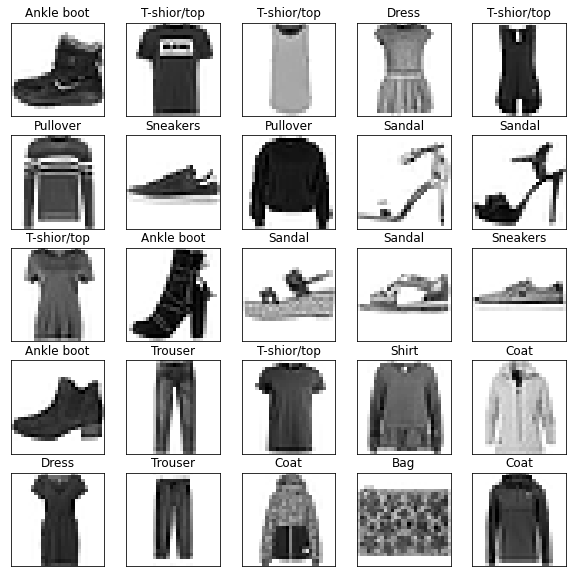

In [39]:
print_sample_data()

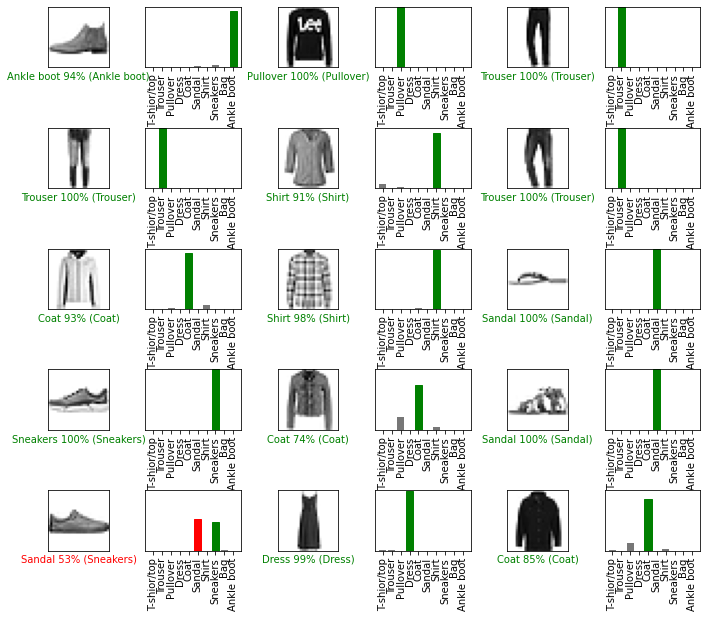

In [40]:
print_prediction()